In [1]:
# change dir
import os
if not os.path.exists('scripts'):
    os.chdir('../../')

TypeError: plot_errorbar() got an unexpected keyword argument 'colored'

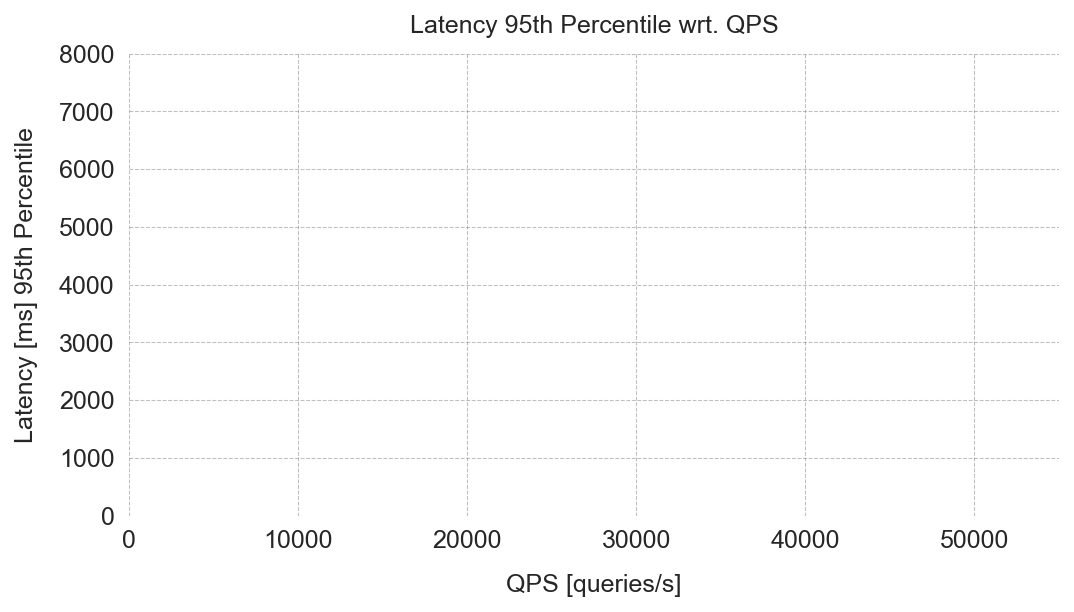

In [2]:
from itertools import cycle
from scripts.plot import *

plt_setup(xlim=(0, 55e3),ylim=(0, 8e3))

colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

benchmarks = os.listdir('results')
for benchmark in benchmarks:
    dfs = load_run_data_folder(f"results/task1/{benchmark}")
    p95_mean, p95_std = get_mean_std(dfs, 'p95')
    qps_mean, qps_std = get_mean_std(dfs, 'QPS')
    plot_errorbar(
        qps_mean,
        p95_mean,
        qps_std,
        p95_std,
        label=f"{benchmark}",
        color=next(colors)
    )
    plt.legend(loc='upper left')
    plt.subplots_adjust(bottom=0.15)
plt.show()